In [3]:
import numpy as np
import pylab as pl
import ot
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


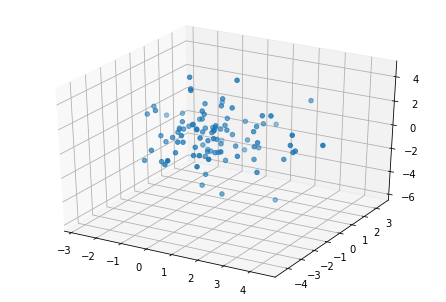

In [109]:
data = np.random.laplace(size=[100,3])

fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = list(data[:,0])
sequence_containing_y_vals = list(data[:,1])
sequence_containing_z_vals = list(data[:,2])

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
pyplot.show()

In [120]:
N = 3
d = 3
n_i = np.random.randint(low=100, high=150)  # nb samples

measures_locations = []
measures_weights = []

for i in range(N):
    x_i = np.random.laplace(size=[n_i,d])
    measures_locations.append(x_i)
    b_i = np.array([1/n_i]*n_i)
    measures_weights.append(b_i)

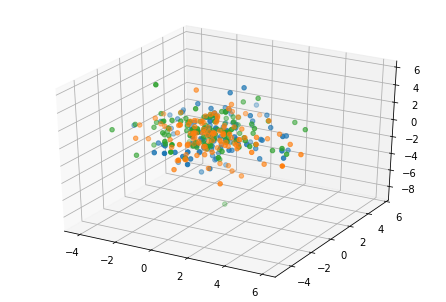

In [121]:
def plot_3d_distrribution(measures_locations, measures_weights):
    fig = pyplot.figure()
    ax = Axes3D(fig)

    for (x_i, b_i) in zip(measures_locations, measures_weights):
        color = np.random.randint(low=1, high=10 * N)
        sequence_containing_x_vals = list(x_i[:,0])
        sequence_containing_y_vals = list(x_i[:,1])
        sequence_containing_z_vals = list(x_i[:,2])
        ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, label='input measure')
    
    
plot_3d_distrribution(measures_locations, measures_weights)
pyplot.show()


In [122]:
k = 60  # number of Diracs of the barycenter
X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations

X_joint = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, weights=np.array([1/N]*N))


In [123]:
X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations

X_12 = ot.lp.free_support_barycenter(measures_locations[:2], measures_weights[:2], X_init, weights=np.array([1/2,1/2]))


In [ ]:
X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations

measures_12_3 = [X_12, measures_locations[2]]
weights = [np.ones(len(X_12))/len(X_12), np.ones(len(measures_locations[2]))/len(measures_locations[2])]
smallest = float("inf")
smallestBeta = -1
dots = []
for i in np.arange(0,1,0.001):
    X_3 = ot.lp.free_support_barycenter(measures_12_3,
                                weights,
                                X_init,
                                weights=np.array([i, 1-i]),
                                                                          numItermax=100)
    M = ot.dist(X_3, X_joint)
    a,b = np.ones((len(X_3),)) / len(X_3), np.ones((len(X_joint),))/len(X_joint)
    G0 = ot.emd(a,b,M)
    dist = np.sum(np.multiply(M,G0))
    if (dist < smallest):
        smallest = dist
        smallestBeta = i
    dots.append( dist )
print(smallest)
print(smallestBeta)

In [ ]:
pl.figure(1)
pl.plot(np.arange(0,1,0.001), dots)
pl.plot([0,1],[0,0])

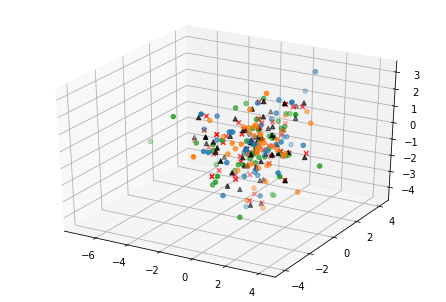

In [116]:
i=smallestBeta
X_3 = ot.lp.free_support_barycenter(measures_12_3,
                                weights,
                                X_init,
                                weights=np.array([i, 1-i]),
                                   numItermax=10000)
fig = pyplot.figure()
ax = Axes3D(fig)

for (x_i, b_i) in zip(measures_locations, measures_weights):
    color = np.random.randint(low=1, high=10 * N)
    sequence_containing_x_vals = list(x_i[:,0])
    sequence_containing_y_vals = list(x_i[:,1])
    sequence_containing_z_vals = list(x_i[:,2])
    ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, label='input measure')    
    
ax.scatter(X_joint[:,0], X_joint[:,1], X_joint[:,2], c='black', marker='^', label='input measure')    
ax.scatter(X_3[:,0], X_3[:,1], X_3[:,2], c='red', marker='x', label='input measure')    

pyplot.show()


In [117]:
from sklearn.decomposition import PCA

def plot_in_low_dim(zh):
    pca_zh = PCA(n_components=2)
    principle_zh = pca_zh.fit_transform(zh)
    pl.figure()
    x,y = np.transpose(principle_zh)
    pl.scatter(x,y,c='r',marker='^')
    pl.show()

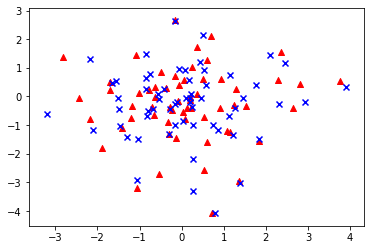

In [118]:

pl.figure()
x,y = X_joint[:,1],X_joint[:,2]
x2,y2 = X_3[:,1],X_3[:,2]
pl.scatter(x,y,c='r',marker='^')
pl.scatter(x2,y2,c='b',marker='x')
pl.show()

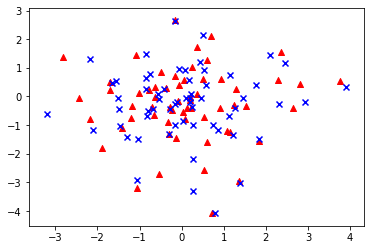

In [119]:

pl.figure()
x,y = X_joint[:,1],X_joint[:,2]
x2,y2 = X_3[:,1],X_3[:,2]
pl.scatter(x,y,c='r',marker='^')
pl.scatter(x2,y2,c='b',marker='x')
pl.show()